<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

### Project Title:  Store Sales Time Series Forecasting

### Project description: Building a model that accurately predicts the unit sales for thousands of items sold at different Favorita stores.

### Hypothesis
### Null Hypothesis: Sales are affected by promotions, oil prices and holidays
### Alternate Hypothesis: Sales are not affected by promotions, oil prices and holidays


### Questions:

## 1. Is the train dataset complete (has all the required dates)?

## 2. Which dates have the lowest and highest sales for each year?

## 3. Did the earthquake impact sales?

## 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

## 5. Are sales affected by promotions, oil prices and holidays?

## 6. What analysis can we get from the date and its extractable features?

## 7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
    


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

#!pip install pandas-profiling

In [2]:
#!pip install plotly

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [3]:
# Data handling
import pandas as pd

import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# EDA (pandas-profiling, etc. )
import pandas_profiling 

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [4]:
stores=pd.read_csv('stores.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
transactions=pd.read_csv('transactions.csv')
oil=pd.read_csv('oil.csv')
holidays=pd.read_csv('holidays_events.csv')
sample_submission=pd.read_csv('sample_submission.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [5]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [10]:
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [11]:
list_datasets = [stores, train, test, transactions, oil, holidays, sample_submission]

In [12]:
def general_info(datasets):
    for data in datasets:
        variable_name  = globals()
        print(data.info())
#         print('\n')
        print('_' * 50)

In [13]:
general_info(list_datasets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Dat

In [14]:
def show_missing_val(datasets):
    for data in datasets:
        print(data.isnull().sum())
        print('_' * 50)

In [15]:
show_missing_val(list_datasets)

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
__________________________________________________
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
__________________________________________________
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
__________________________________________________
date            0
store_nbr       0
transactions    0
dtype: int64
__________________________________________________
date           0
dcoilwtico    43
dtype: int64
__________________________________________________
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
__________________________________________________
id       0
sales    0
dtype: int64
__________________________________________________


### 1. Is the train dataset complete (has all the required dates)?

In [16]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [17]:
train['date'] = pd.to_datetime(train['date'])

In [18]:
train['date'].min(), train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [19]:
#getting dates which are not in the train dataset
missing_dates=pd.date_range(start= '2013-01-01', end='2017-08-15').difference(train.date)

#print(pd.date_range(start= '2013-01-01', end='2017-08-15').difference(train.index))
print(missing_dates)

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [20]:
#to fix missing dates in the train dataset, we would import iterable product
#this will help us to loop over each item in the selected arguments 

from itertools import product

In [21]:
#creating variables as arguments for the product() method

missing_dates
uniques_stores=train.store_nbr.unique()
unique_family=train.family.unique()

In [22]:
#we will replace the missing dates by pairing it with all the unique stores and families
replace_dates=list(product(missing_dates, uniques_stores,unique_family ))

In [23]:
#replace_dates

In [24]:
#creating a dataframe for the replaced dates
replace_dates_df=pd.DataFrame(replace_dates, columns=['date', 'store_nbr', 'family'])
replace_dates_df.head()

,date,store_nbr,family
0,2013-12-25,1,AUTOMOTIVE
1,2013-12-25,1,BABY CARE
2,2013-12-25,1,BEAUTY
3,2013-12-25,1,BEVERAGES
4,2013-12-25,1,BOOKS


In [25]:
#adding replaced dates to our train data
new_train_data=pd.concat([train, replace_dates_df], ignore_index=True)
new_train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0.0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1.0,2013-01-01,1,BABY CARE,0.0,0.0
2,2.0,2013-01-01,1,BEAUTY,0.0,0.0
3,3.0,2013-01-01,1,BEVERAGES,0.0,0.0
4,4.0,2013-01-01,1,BOOKS,0.0,0.0


In [26]:
missing_dates=pd.date_range(start= '2013-01-01', end='2017-08-15').difference(new_train_data.date)
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [27]:
new_train_data.isnull().sum()

id             7128
date              0
store_nbr         0
family            0
sales          7128
onpromotion    7128
dtype: int64

In [28]:
#dropping id column since it's not relevant
new_train_data_df=new_train_data.drop('id', axis='columns')

new_train_data_df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,2013-01-01,1,BABY CARE,0.0,0.0
2,2013-01-01,1,BEAUTY,0.0,0.0
3,2013-01-01,1,BEVERAGES,0.0,0.0
4,2013-01-01,1,BOOKS,0.0,0.0


In [29]:
#filling Nan values in sales and onpromotion column with 0
new_train_data_df.fillna(0,inplace=True)
new_train_data_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

>- There were some missing dates in the data. They were: '2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'

## 2. Which dates have the lowest and highest sales for each year?

In [30]:
train_copy = new_train_data_df.copy()

In [31]:
train_copy['Year'] = train_copy['date'].dt.year

In [32]:
train_copy.head()

,date,store_nbr,family,sales,onpromotion,Year
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,2013
1,2013-01-01,1,BABY CARE,0.0,0.0,2013
2,2013-01-01,1,BEAUTY,0.0,0.0,2013
3,2013-01-01,1,BEVERAGES,0.0,0.0,2013
4,2013-01-01,1,BOOKS,0.0,0.0,2013


In [33]:
aggregate_sales = train_copy.groupby(['date']).agg(daily_sales=('sales', 'sum'), year=('Year', 'mean'))
aggregate_sales.head()

,daily_sales,year
date,,
2013-01-01,2511.618999,2013
2013-01-02,496092.417944,2013
2013-01-03,361461.231124,2013
2013-01-04,354459.677093,2013
2013-01-05,477350.121229,2013


In [34]:
def min_max_sales(aggregate):
    unique_years = aggregate['year'].unique().tolist()
    for year in unique_years:
        year_agg = aggregate.loc[str(year)]
        max_sale = year_agg['daily_sales'].max()
        min_sale = year_agg['daily_sales'].min()
        print(f'The maximum and minimum sales in {year} are ${max_sale:,.2f} and ${min_sale:,.2f} respectively')

In [35]:
min_max_sales(aggregate_sales)

The maximum and minimum sales in 2013 are $792,865.28 and $0.00 respectively
The maximum and minimum sales in 2014 are $1,064,977.97 and $0.00 respectively
The maximum and minimum sales in 2015 are $1,234,130.94 and $0.00 respectively
The maximum and minimum sales in 2016 are $1,345,920.60 and $0.00 respectively
The maximum and minimum sales in 2017 are $1,463,083.96 and $12,082.50 respectively


## 3. Did the earthquake impact sales?

Note:A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [36]:

new_train_data_df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,2013-01-01,1,BABY CARE,0.0,0.0
2,2013-01-01,1,BEAUTY,0.0,0.0
3,2013-01-01,1,BEVERAGES,0.0,0.0
4,2013-01-01,1,BOOKS,0.0,0.0


In [37]:
#getting two weeks sales before the earthquake
start_date='2016-04-01'
end_date='2016-04-15'
#setting date to datetime
new_train_data_df['date']=pd.to_datetime(new_train_data_df['date'])

#getting start and end date using mask function to select rows between dates

mask = (new_train_data_df['date']>=start_date) & (new_train_data_df['date']<=end_date)

start_end_df_b4=new_train_data_df.loc[mask]
start_end_df_b4.head()

,date,store_nbr,family,sales,onpromotion
2108106,2016-04-01,1,AUTOMOTIVE,8.0,0.0
2108107,2016-04-01,1,BABY CARE,0.0,0.0
2108108,2016-04-01,1,BEAUTY,2.0,0.0
2108109,2016-04-01,1,BEVERAGES,2274.0,8.0
2108110,2016-04-01,1,BOOKS,0.0,0.0


In [38]:
sales_b4= start_end_df_b4['sales'].sum()
print('Total sales before earthquake:', sales_b4)

Total sales before earthquake: 11974506.359719701


In [39]:
#aggregate of sales before 
aggregate_sales_b4=start_end_df_b4.groupby(['date'])['sales'].sum()
aggregate_sales_b4

date
2016-04-01    8.724673e+05
2016-04-02    1.150825e+06
2016-04-03    1.266908e+06
2016-04-04    7.952372e+05
2016-04-05    7.257501e+05
2016-04-06    7.447848e+05
2016-04-07    5.879397e+05
2016-04-08    6.897272e+05
2016-04-09    9.279814e+05
2016-04-10    1.008877e+06
2016-04-11    6.653490e+05
2016-04-12    6.516570e+05
2016-04-13    6.726115e+05
2016-04-14    5.467852e+05
2016-04-15    6.676063e+05
Name: sales, dtype: float64

In [40]:
#getting two weeks sales after the earthquake
start_date='2016-04-17'
end_date='2016-04-30'
#setting date to datetime
new_train_data_df['date']=pd.to_datetime(new_train_data_df['date'])

#getting start and end date using mask function to select rows between dates

mask= (new_train_data_df['date']>=start_date) & (new_train_data_df['date']<=end_date)

start_end_df_after=new_train_data_df.loc[mask]
start_end_df_after.head()

,date,store_nbr,family,sales,onpromotion
2136618,2016-04-17,1,AUTOMOTIVE,1.0,0.0
2136619,2016-04-17,1,BABY CARE,0.0,0.0
2136620,2016-04-17,1,BEAUTY,3.0,0.0
2136621,2016-04-17,1,BEVERAGES,1717.0,3.0
2136622,2016-04-17,1,BOOKS,0.0,0.0


In [41]:
sales_after= start_end_df_after['sales'].sum()
print('Total sales after earthquake:', sales_after)

Total sales after earthquake: 13126397.250206502


In [42]:
#aggregate of sales before 
aggregate_sales_after=start_end_df_after.groupby(['date'])['sales'].sum()
aggregate_sales_after

date
2016-04-17    1.271834e+06
2016-04-18    1.345921e+06
2016-04-19    1.152089e+06
2016-04-20    1.062426e+06
2016-04-21    1.001080e+06
2016-04-22    8.570592e+05
2016-04-23    1.022143e+06
2016-04-24    1.039370e+06
2016-04-25    6.800008e+05
2016-04-26    7.047994e+05
2016-04-27    6.702881e+05
2016-04-28    5.433398e+05
2016-04-29    7.087114e+05
2016-04-30    1.067336e+06
Name: sales, dtype: float64

In [1]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
    x=aggregate_sales_b4.reset_index()['date'].astype('str').values.tolist(),
    y=aggregate_sales_b4.reset_index()['sales'].values.tolist(), name='sales_before'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=aggregate_sales_after.reset_index()['date'].astype('str').values.tolist(),
    y=aggregate_sales_after.reset_index()['sales'].values.tolist(),  name='sales_after'
), row=1, col=1)

fig.update_layout(height=900, width=1000, title_text="Impact of earthquake on sales before and after")
fig.show()

NameError: name 'go' is not defined

>- The earthquake impacted sales. The very next day after the earthquake the sales shot from around 650,000 on the day before to more than 1,500,000 the day after. 

## 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [44]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [45]:
sales_stores_data=pd.merge(new_train_data_df, stores, on=['store_nbr'])
sales_stores_data.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13


In [46]:
def unique_values(data):
    for column in data.columns:
        print(f'The unique values in {column} column are: {", ".join(data[column].astype(str).unique().tolist())}')
        print('\n')
        print('-' * 120)

In [47]:
unique_values(stores)

The unique values in store_nbr column are: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54


------------------------------------------------------------------------------------------------------------------------
The unique values in city column are: Quito, Santo Domingo, Cayambe, Latacunga, Riobamba, Ibarra, Guaranda, Puyo, Ambato, Guayaquil, Salinas, Daule, Babahoyo, Quevedo, Playas, Libertad, Cuenca, Loja, Machala, Esmeraldas, Manta, El Carmen


------------------------------------------------------------------------------------------------------------------------
The unique values in state column are: Pichincha, Santo Domingo de los Tsachilas, Cotopaxi, Chimborazo, Imbabura, Bolivar, Pastaza, Tungurahua, Guayas, Santa Elena, Los Rios, Azuay, Loja, El Oro, Esmeraldas, Manabi


--------------------------------------------------

In [48]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
city_aggregate = sales_stores_data.groupby(['city'])['sales'].mean().sort_values(ascending=False).reset_index()
city_aggregate.head()

,city,sales
0,Quito,555.258
1,Cayambe,508.501
2,Ambato,361.773
3,Daule,344.464
4,Loja,338.575


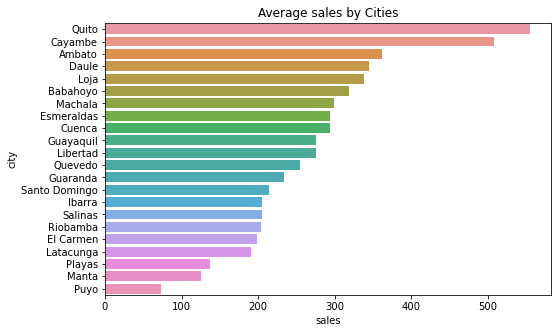

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='sales', y='city', data=city_aggregate, orient='h')
plt.title('Average sales by Cities')
plt.show()

In [50]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cluster_aggregate = sales_stores_data.groupby(['cluster'])['sales'].mean().sort_values(ascending=False).reset_index()
cluster_aggregate['cluster'] = cluster_aggregate['cluster'].astype(str)
cluster_aggregate.head()

,cluster,sales
0,5,1114.598
1,14,706.549
2,8,645.844
3,11,602.077
4,17,590.828


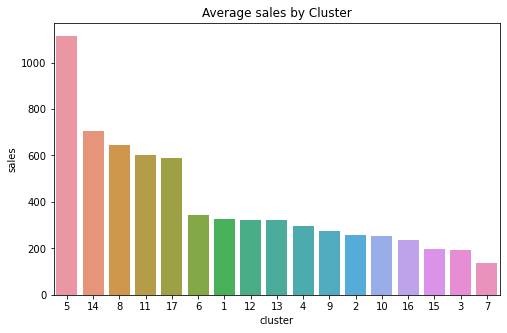

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x='cluster', y='sales', data=cluster_aggregate)
plt.title('Average sales by Cluster')
plt.show()

In [52]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
state_aggregate = sales_stores_data.groupby(['state'])['sales'].mean().sort_values(ascending=False).reset_index()
state_aggregate.head()

,state,sales
0,Pichincha,552.797
1,Tungurahua,361.773
2,Loja,338.575
3,El Oro,299.680
4,Esmeraldas,294.264


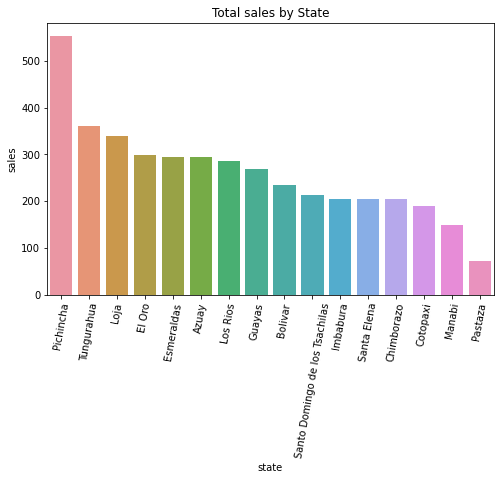

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x='state', y='sales', data=state_aggregate)
plt.title('Total sales by State')
plt.xticks(rotation=80)
plt.show()

In [54]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
type_aggregate = sales_stores_data.groupby(['type'])['sales'].mean().sort_values(ascending=False).reset_index()
type_aggregate.head()


,type,sales
0,A,704.206
1,D,350.148
2,B,325.965
3,E,268.484
4,C,196.796


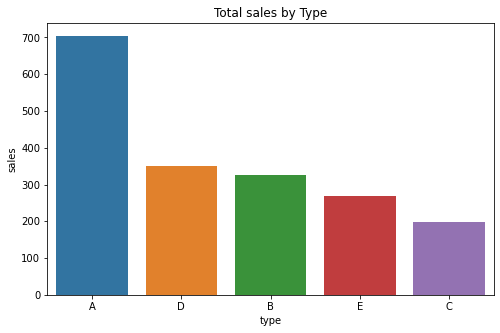

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='sales', data=type_aggregate)
plt.title('Total sales by Type')
plt.show()

## 5. Are sales affected by promotions, oil prices and holidays?


#### oil

In [56]:
oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.140
2,2013-01-03,92.970
3,2013-01-04,93.120
4,2013-01-07,93.200


In [57]:
oil['date'] = pd.to_datetime(oil['date'])

In [58]:
oil_train = pd.merge(new_train_data_df, oil, on='date', how='left')

In [59]:
oil_price_group = oil_train.groupby(['dcoilwtico'], as_index=False)['sales'].mean()
oil_price_group.head()

,dcoilwtico,sales
0,26.190,362.725
1,26.680,414.559
2,27.540,443.877
3,27.960,419.158
4,28.470,354.057


Text(0, 0.5, 'Sales')

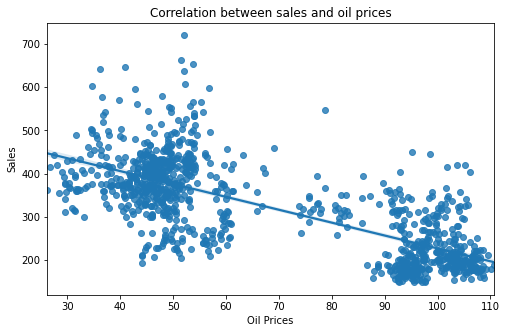

In [60]:
plt.figure(figsize=(8, 5))
sns.regplot(data=oil_price_group, x='dcoilwtico', y='sales')
plt.title('Correlation between sales and oil prices')
plt.xlabel('Oil Prices')
plt.ylabel('Sales')

In [61]:
#### onpromo

In [62]:
onpromo_df = new_train_data_df[['sales', 'onpromotion']]
onpromo_df.head()

,sales,onpromotion
0,0.000,0.000
1,0.000,0.000
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000


In [63]:
onpromo_group = onpromo_df.groupby(['onpromotion'], as_index=False)['sales'].mean()
onpromo_group.head()

,onpromotion,sales
0,0.000,157.776
1,1.000,467.557
2,2.000,662.926
3,3.000,871.408
4,4.000,969.916


Text(0, 0.5, 'Sales')

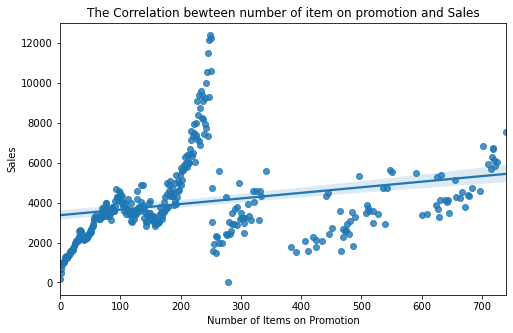

In [64]:
plt.figure(figsize=(8, 5))
sns.regplot(data=onpromo_group, x='onpromotion', y='sales')
plt.title('The Correlation bewteen number of item on promotion and Sales')
plt.xlabel('Number of Items on Promotion')
plt.ylabel('Sales')

#### holidays

In [65]:
holidays['date'] = pd.to_datetime(holidays['date'])
slice_holidays = holidays[['date', 'type', 'transferred']]

In [66]:
holidays_train = pd.merge(new_train_data_df, slice_holidays, on='date', how='left')
holidays_train.head()

,date,store_nbr,family,sales,onpromotion,type,transferred
0,2013-01-01,1,AUTOMOTIVE,0.000,0.000,Holiday,False
1,2013-01-01,1,BABY CARE,0.000,0.000,Holiday,False
2,2013-01-01,1,BEAUTY,0.000,0.000,Holiday,False
3,2013-01-01,1,BEVERAGES,0.000,0.000,Holiday,False
4,2013-01-01,1,BOOKS,0.000,0.000,Holiday,False


In [67]:
holidays_train['type'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

>- Sales are affected by promotion, oil and holidays.
>- The increase in oil prices results in the decrease of sales.
>- The more the number of items on a promotion in a store the higher the sales

## 6. What analysis can we get from the date and its extractable features?

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [68]:
# merge dataframes
data = pd.merge(new_train_data_df, oil, on='date', how='left')
new_train_data = pd.merge(data, holidays, on='date', how='left')
train_data = pd.merge(new_train_data, stores, on='store_nbr', how='left')

In [69]:
train_data.head(10)

,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
5,2013-01-01,1,BREAD/BAKERY,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
6,2013-01-01,1,CELEBRATION,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
7,2013-01-01,1,CLEANING,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
8,2013-01-01,1,DAIRY,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
9,2013-01-01,1,DELI,0.000,0.000,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13


## New Features Creation

In [70]:
train_data = train_data.set_index('date')

In [71]:
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['DayOfMonth'] = train_data.index.day
train_data['DaysInMonth'] = train_data.index.days_in_month
train_data['DayOfYear'] = train_data.index.day_of_year
train_data['Week'] = train_data.index.weekofyear
train_data['Is_month_start'] = train_data.index.is_month_start.astype(int)
train_data['Is_month_end'] = train_data.index.is_month_end.astype(int)
train_data['Quarter'] = train_data.index.quarter
train_data['Is_quarter_start'] = train_data.index.is_quarter_start.astype(int)
train_data['Is_quarter_end'] = train_data.index.is_quarter_end.astype(int)
train_data['Is_year_start'] = train_data.index.is_year_start.astype(int)
train_data['Is_year_end'] = train_data.index.is_year_end.astype(int)
# train_data = train_data.reset_index(drop=False)


In [72]:
train_data = train_data.drop(columns=['description'])
train_data.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,transferred,city,...,DaysInMonth,DayOfYear,Week,Is_month_start,Is_month_end,Quarter,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0.000,NaN,Holiday,National,Ecuador,False,Quito,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BABY CARE,0.000,0.000,NaN,Holiday,National,Ecuador,False,Quito,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BEAUTY,0.000,0.000,NaN,Holiday,National,Ecuador,False,Quito,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BEVERAGES,0.000,0.000,NaN,Holiday,National,Ecuador,False,Quito,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BOOKS,0.000,0.000,NaN,Holiday,National,Ecuador,False,Quito,...,31,1,1,1,0,1,1,0,1,0


In [73]:
train_data = train_data.rename(columns={'store_nbr': 'Store_number', 'family':'Family', 'sales': 'Sales', 'onpromotion': 'Item_onpromo', \
                          'dcoilwtico': 'Oil_prices','type_x': 'Holiday_type', 'locale': 'Local','locale_name': 'Local_name',\
                          'transferred':'Holiday_transferred', 'city': 'Store_city', \
                          'state': 'Store_state', 'type_y': 'Store_type','cluster': 'Cluster'})

## Impute Missing Values

In [74]:
train_data.isnull().sum()

Store_number                 0
Family                       0
Sales                        0
Item_onpromo                 0
Oil_prices              962280
Holiday_type           2551824
Local                  2551824
Local_name             2551824
Holiday_transferred    2551824
Store_city                   0
Store_state                  0
Store_type                   0
Cluster                      0
Year                         0
Month                        0
DayOfMonth                   0
DaysInMonth                  0
DayOfYear                    0
Week                         0
Is_month_start               0
Is_month_end                 0
Quarter                      0
Is_quarter_start             0
Is_quarter_end               0
Is_year_start                0
Is_year_end                  0
dtype: int64

In [75]:
train_data['Oil_prices'] = train_data['Oil_prices'].interpolate(limit_direction ='backward').interpolate(method ='linear', limit_direction ='forward')
train_data['Oil_prices'].isnull().sum()

0

In [76]:
train_data = train_data.ffill().bfill()
train_data.isnull().sum()

Store_number           0
Family                 0
Sales                  0
Item_onpromo           0
Oil_prices             0
Holiday_type           0
Local                  0
Local_name             0
Holiday_transferred    0
Store_city             0
Store_state            0
Store_type             0
Cluster                0
Year                   0
Month                  0
DayOfMonth             0
DaysInMonth            0
DayOfYear              0
Week                   0
Is_month_start         0
Is_month_end           0
Quarter                0
Is_quarter_start       0
Is_quarter_end         0
Is_year_start          0
Is_year_end            0
dtype: int64

## Features Encoding




In [78]:
# Use pandas.DataFrame.drop_duplicates method
y_train = train_data['Sales'].copy()
x_train = train_data.drop(columns=['Sales'])
numerical_train = x_train.drop(columns=['Family','Holiday_type', 'Local', 'Local_name', 'Holiday_transferred', 'Store_city', 'Store_type', 'Store_state'])

In [89]:
# Code here
x_train.head()

,Store_number,Family,Item_onpromo,Oil_prices,Holiday_type,Local,Local_name,Holiday_transferred,Store_city,Store_state,...,DaysInMonth,DayOfYear,Week,Is_month_start,Is_month_end,Quarter,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.000,93.140,Holiday,National,Ecuador,False,Quito,Pichincha,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BABY CARE,0.000,93.140,Holiday,National,Ecuador,False,Quito,Pichincha,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BEAUTY,0.000,93.140,Holiday,National,Ecuador,False,Quito,Pichincha,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BEVERAGES,0.000,93.140,Holiday,National,Ecuador,False,Quito,Pichincha,...,31,1,1,1,0,1,1,0,1,0
2013-01-01,1,BOOKS,0.000,93.140,Holiday,National,Ecuador,False,Quito,Pichincha,...,31,1,1,1,0,1,1,0,1,0


## Dataset Splitting

In [80]:
# Use train_test_split with a random_state, and add stratify for Classification

## Features Scaling


In [81]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

In [82]:
num_cols = numerical_train.columns
cat_cols = ['Family','Holiday_type', 'Local', 'Local_name', 'Holiday_transferred', 'Store_city', 'Store_type', 'Store_state']

In [83]:
num_cols

Index(['Store_number', 'Item_onpromo', 'Oil_prices', 'Cluster', 'Year',
       'Month', 'DayOfMonth', 'DaysInMonth', 'DayOfYear', 'Week',
       'Is_month_start', 'Is_month_end', 'Quarter', 'Is_quarter_start',
       'Is_quarter_end', 'Is_year_start', 'Is_year_end'],
      dtype='object')

In [84]:
cat_cols

['Family',
 'Holiday_type',
 'Local',
 'Local_name',
 'Holiday_transferred',
 'Store_city',
 'Store_type',
 'Store_state']

In [90]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline to handle the numerical columns of the training dataset
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
categorical_colunm_encoder = OneHotEncoder()

from sklearn.compose import ColumnTransformer
# Separate the columns into categorical and numerical columns
numerical_attributes = list(num_cols)
categorical_attributes = cat_cols


full_pipeline = ColumnTransformer([('num', num_pipeline, numerical_attributes), ('cat', categorical_colunm_encoder, categorical_attributes)])



In [96]:
x_train = full_pipeline.fit_transform(x_train)
# Use sklearn.impute.SimpleImputer

In [97]:
x_train.shape

(3061476, 128)

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Liner Regression

### Create the Model

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

### Train the Model

In [103]:
# Use the .fit method
lin_reg.fit(x_train, y_train)

LinearRegression()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [106]:
lin_predictions = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, lin_predictions)
print(lin_mse)

lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

526348.9517391785
725.4991052642164


In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [ ]:
', '.join(['1', '3', '5', '7'])